In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('1713.csv')

In [3]:
data.head()

,vin,fleet,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,...,total_engine_hours,total_distance,time_sweetspot,time_idle,time_pto,time_drive,speed,msg_trigger_type,current_fuel_level,received_date
0,MC2M7SRC0HK051713,Syndicate_Carrier,1249430920,12863,NaN,0,0,30.637448,76.758179,292,...,1511.15,160208.97,461.3,135.70,0,1375.1,0,IGNITION_ON,23.600000,23:24.1
1,MC2M7SRC0HK051713,Syndicate_Carrier,1249430918,12863,NaN,0,0,30.637448,76.758179,292,...,1511.15,160208.97,461.3,135.70,0,1375.1,0,PERIODIC,23.600000,23:24.0
2,MC2M7SRC0HK051713,Syndicate_Carrier,1249430908,12863,NaN,0,0,30.637446,76.758194,289,...,1511.25,160208.97,461.3,135.78,0,1375.1,0,PERIODIC,23.600000,23:23.9
3,MC2M7SRC0HK051713,Syndicate_Carrier,1249430911,12863,NaN,0,0,30.637453,76.758161,288,...,1511.35,160208.97,461.3,135.87,0,1375.1,0,PERIODIC,23.600000,23:23.9
4,MC2M7SRC0HK051713,Syndicate_Carrier,1249430905,12863,NaN,0,0,30.637482,76.758151,290,...,1511.35,160208.97,461.3,135.89,0,1375.1,0,IGNITION_OFF,23.200001,23:23.8


In [5]:
df = data[data['time_idle'] > 120] 

In [6]:
data1=df[['latitude','longitude','time_idle']]

In [7]:
data1.head()

,latitude,longitude,time_idle
0,30.637448,76.758179,135.70
1,30.637448,76.758179,135.70
2,30.637446,76.758194,135.78
3,30.637453,76.758161,135.87
4,30.637482,76.758151,135.89


In [8]:
data1.describe()

,latitude,longitude,time_idle
count,4075.000000,4075.000000,4075.000000
mean,22.808321,75.051834,143.308118
std,4.326928,1.070142,4.250875
min,16.697769,73.824353,135.700000
25%,18.449528,74.045593,139.920000
50%,22.060327,74.704818,142.550000
75%,27.000171,75.775702,147.700000
max,30.637491,77.168538,150.050000


In [9]:
x = data1.iloc[:,2:3]

In [10]:
x

,time_idle
0,135.70
1,135.70
2,135.78
3,135.87
4,135.89
5,135.89
6,135.89
7,135.89
8,135.89
9,135.89


In [11]:
kmeans = KMeans(4)

In [12]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 3, ..., 1, 1, 1])

In [14]:
data_with_clusters = data1.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,latitude,longitude,time_idle,Cluster
0,30.637448,76.758179,135.70,3
1,30.637448,76.758179,135.70,3
2,30.637446,76.758194,135.78,3
3,30.637453,76.758161,135.87,3
4,30.637482,76.758151,135.89,3
5,30.637390,76.758111,135.89,3
6,30.637431,76.758144,135.89,3
7,30.637448,76.758157,135.89,3
8,30.637460,76.758170,135.89,3
9,30.637477,76.758145,135.89,3


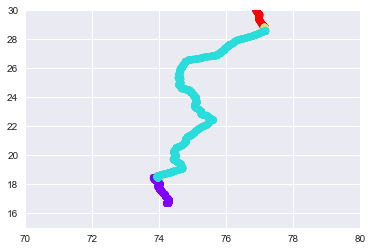

In [15]:
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(70,80)
plt.ylim(15,30)
plt.show()